- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

X, y = datasets.load_boston(return_X_y=True)


boston_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
               'DIS', 'RAD', 'TAX', 'PTRATIO', 'B1000', 'LSTAT', ]
boston_obj = {}

for i in range(0, len(boston_cols)):
    boston_obj[boston_cols[i]] = X[:, np.newaxis, i].ravel()

boston_obj['MEDV'] = y

pd_boston = pd.DataFrame(boston_obj)

corr  = pd_boston.corr()
corr.style.background_gradient()


/Users/chuisi/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


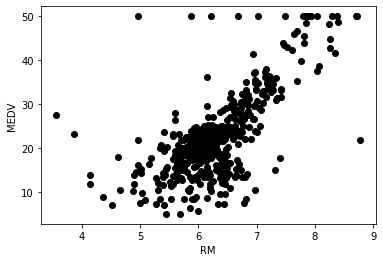

In [4]:
import matplotlib.pyplot as plt
df = pd.DataFrame({'x': boston_obj['RM'], 'y': boston_obj['MEDV']})

df.sort_values(by='x', inplace=True)

points = pd.DataFrame(df).to_numpy()

# plt.plot(points[:, 0], points[:, 1], color="blue", linewidth=3)

factory_col = 'RM'
plt.scatter(boston_obj[factory_col], boston_obj['MEDV'], color="black")

plt.xlabel(factory_col)
plt.ylabel('MEDV')
plt.show()


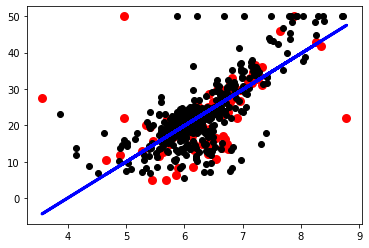

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = boston_obj[factory_col][:, np.newaxis]
y = boston_obj['MEDV'][:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

log_reg = linear_model.LinearRegression()

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.scatter(X_test, y_test, color="red")

plt.scatter(X_train, y_train, color="black")
